# **Final project. Advanced Programming**
Aina Nurgaliyeva & Raziya Abutalipova

**"SmartMethane"** is a model, that ensures that harmful gas does not fall into the environment, eliminate the release of toxic substances that leads to poisoning of people and determine in advance the presence of methane in mines to prevent explosions. It helps to make predictions about future events.

# **1. Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px



from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten
from keras.utils import to_categorical

# **2.Load the dataset into a pandas dataframe**

In [2]:
data = pd.read_excel('Dataset.xlsx')
print(data.dtypes)
data

Country     object
Sector      object
Year         int64
Value      float64
dtype: object


,Country,Sector,Year,Value
0,Indonesia,Industrial Processes,1992,0.00
1,Zimbabwe,Industrial Processes,1992,0.00
2,Qatar,Industrial Processes,1992,0.00
3,Thailand,Industrial Processes,1992,0.00
4,India,Industrial Processes,1992,0.00
...,...,...,...,...
50397,Palau,Total excluding LUCF,1999,0.02
50398,Palau,Total excluding LUCF,1998,0.02
50399,Cook Islands,Total excluding LUCF,1998,0.02
50400,Cook Islands,Total excluding LUCF,1997,0.02


In [3]:
# fill missing values with the mean of the column
mean_value = data.mean()
data.fillna(value=mean_value, inplace=True)

# split data into training and test sets
# X = data.iloc[:, :-1].values
# y = data.iloc[:, -1].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


<ipython-input-3-f63dd4e6fb9f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_value = data.mean()


In [ ]:
# Set dependent and independent variables
X = data.drop(columns=['Value'])
y = data['Value']

In [ ]:
X

,Country,Sector,Year
0,Indonesia,Industrial Processes,1992
1,Zimbabwe,Industrial Processes,1992
2,Qatar,Industrial Processes,1992
3,Thailand,Industrial Processes,1992
4,India,Industrial Processes,1992
...,...,...,...
50397,Palau,Total excluding LUCF,1999
50398,Palau,Total excluding LUCF,1998
50399,Cook Islands,Total excluding LUCF,1998
50400,Cook Islands,Total excluding LUCF,1997


In [ ]:
data = pd.get_dummies(data, columns=["Country", "Sector"])
data

,Year,Value,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,...,Country_Zimbabwe,Sector_Agriculture,Sector_Energy,Sector_Fugitive Emissions,Sector_Industrial Processes,Sector_Land-Use Change and Forestry,Sector_Other Fuel Combustion,Sector_Total excluding LUCF,Sector_Total including LUCF,Sector_Waste
0,1992,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1992,0.00,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1992,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1992,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1992,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50397,1999,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50398,1998,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50399,1998,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50400,1997,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train = data[data['Year'] < 2013]
test = data[(data['Year'] >= 2013) & (data['Year'] <= 2018)]

In [ ]:
train

,Year,Value,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,...,Country_Zimbabwe,Sector_Agriculture,Sector_Energy,Sector_Fugitive Emissions,Sector_Industrial Processes,Sector_Land-Use Change and Forestry,Sector_Other Fuel Combustion,Sector_Total excluding LUCF,Sector_Total including LUCF,Sector_Waste
0,1992,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1992,0.00,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1992,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1992,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1992,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50397,1999,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50398,1998,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50399,1998,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50400,1997,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
test

,Year,Value,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,...,Country_Zimbabwe,Sector_Agriculture,Sector_Energy,Sector_Fugitive Emissions,Sector_Industrial Processes,Sector_Land-Use Change and Forestry,Sector_Other Fuel Combustion,Sector_Total excluding LUCF,Sector_Total including LUCF,Sector_Waste
1193,2018,0.00,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1194,2018,0.00,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1195,2018,0.00,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1196,2018,0.00,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1197,2018,0.00,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50379,2017,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50380,2016,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50381,2015,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50382,2014,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
Xtrain = train.iloc[:, :-1].values
ytrain = train.iloc[:, -1].values

Xtest = test.iloc[:, :-1].values
ytest = test.iloc[:, -1].values

# **RNN**

*Create the model*

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

*Compile the model*

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

*Train the model*

In [ ]:
history=model.fit(Xtrain, ytrain, epochs=5, validation_data=(Xtest, ytest), batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 282s 219ms/step - loss: 0.0759 - accuracy: 0.9767 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 2/5
1250/1250 [==============================] - 239s 191ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0014 - val_accuracy: 0.9994
Epoch 3/5
1250/1250 [==============================] - 249s 199ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0018 - val_accuracy: 0.9994
Epoch 4/5
1250/1250 [==============================] - 252s 202ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 5/5
1250/1250 [==============================] - 249s 199ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 3.6589e-04 - val_accuracy: 1.0000


*Plot the loss and accuracy graphs*

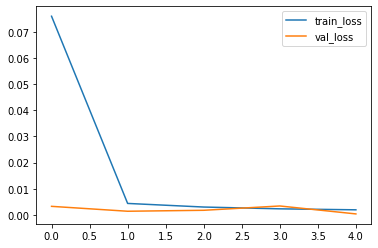

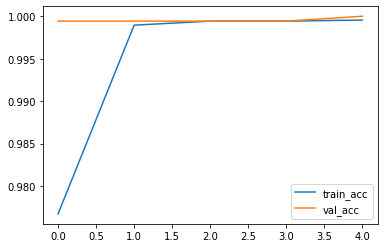

In [ ]:
# Plot the loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

*Evaluate the model on the test set*

In [ ]:
test_loss, test_acc = model.evaluate(Xtest, ytest)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

326/326 [==============================] - 16s 49ms/step - loss: 3.6589e-04 - accuracy: 1.0000
Test Accuracy: 1.0
Test Loss: 0.0003658875357359648


*Prediction of the RNN*

In [ ]:
predictions = model(Xtest).numpy()
print(predictions)
predictions.shape

[[1.0050805e-06]
 [1.0050805e-06]
 [1.0050805e-06]
 ...
 [4.5881694e-07]
 [4.5881782e-07]
 [4.5881782e-07]]


(10428, 1)

# **CNN**

*Creating the model CNN*

In [ ]:
Xtrain = Xtrain.reshape((Xtrain.shape[0], Xtrain.shape[1], 1))
input_shape = (Xtrain.shape[1], Xtrain.shape[2])

model2 = Sequential()
model2.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Dropout(0.2))
model2.add(Conv1D(128, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(Xtrain, ytrain, epochs=5, validation_data=(Xtest, ytest), batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 54s 42ms/step - loss: 1.2708 - accuracy: 0.8770 - val_loss: 0.2477 - val_accuracy: 0.8895
Epoch 2/5
1250/1250 [==============================] - 52s 41ms/step - loss: 0.2557 - accuracy: 0.8894 - val_loss: 0.2469 - val_accuracy: 0.8895
Epoch 3/5
1250/1250 [==============================] - 49s 39ms/step - loss: 0.2527 - accuracy: 0.8895 - val_loss: 0.2544 - val_accuracy: 0.8895
Epoch 4/5
1250/1250 [==============================] - 49s 39ms/step - loss: 0.2495 - accuracy: 0.8894 - val_loss: 0.2399 - val_accuracy: 0.8895
Epoch 5/5
1250/1250 [==============================] - 47s 38ms/step - loss: 0.2444 - accuracy: 0.8895 - val_loss: 0.2408 - val_accuracy: 0.8895


*Plot the loss and accuracy graphs*

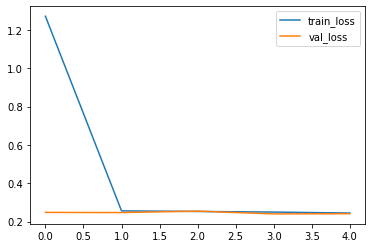

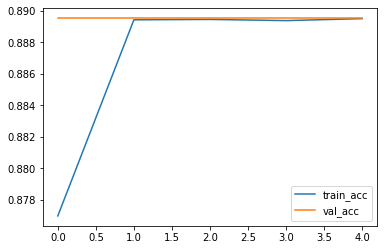

In [ ]:
# Plot the loss
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history2.history['accuracy'], label='train_acc')
plt.plot(history2.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

*Evaluate the model on the test set*

In [ ]:
test_loss, test_acc = model2.evaluate(Xtest, ytest)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

326/326 [==============================] - 3s 10ms/step - loss: 0.2408 - accuracy: 0.8895
Test Accuracy: 0.889528214931488
Test Loss: 0.2408302128314972


*Prediction of the CNN*

In [ ]:
predictions2 = model2(Xtest).numpy()
print(predictions2)
predictions2.shape

[[1.11335940e-11]
 [1.44205333e-11]
 [1.07045406e-11]
 ...
 [2.70193040e-01]
 [2.70063609e-01]
 [2.69934237e-01]]


(10428, 1)

# **Numerical calculations**

The formula for calculating the concentration of methane depends on the context in which the calculation is being performed.

In general, the concentration of a substance in a mixture can be calculated using the following formula:

**Concentration (C) = Mass of Substance (m) / Volume of Mixture (V)**

where 
- C - concentration [*grams per liter (g/L) or milligrams per milliliter (mg/mL)*], 
- m - mass of the substance,
- V - volume of the mixture. 

In the case of methane , the formula would look like this:

**Concentration of Methane (C_methane) = Mass of Methane (m_methane) / Volume of Mixture (V)**

In this formula, C_methane represents the concentration of methane in the mixture, m_methane represents the mass of methane, and V represents the volume of the mixture.

In [ ]:
volume_mixture = 1000 # in milliliters

def methane_concentration(predictions2, volume_mixture):
    concentrations = []
    for prediction in predictions2:
        concentration = float(prediction) / volume_mixture
        concentrations.append(concentration)
    return concentrations

In [ ]:
conc_methane = methane_concentration(predictions2, volume_mixture)
conc_methane

[1.1133594046697226e-14,
 1.4420533343828533e-14,
 1.0704540552575193e-14,
 1.614659621285153e-14,
 1.685726142008903e-13,
 1.4528978714567487e-14,
 2.3221784495319753e-12,
 3.421984118290311e-11,
 5.347875475791852e-13,
 2.5234438538745963e-11,
 6.19621742803389e-13,
 2.6714754852719123e-12,
 3.1306190972912874e-12,
 7.564734394449602e-13,
 9.739389850160763e-14,
 6.796807561215701e-13,
 3.438599127658648e-13,
 2.2574737634784014e-12,
 6.835106924896195e-13,
 1.1788991116645775e-11,
 2.3480462019165315e-12,
 3.494241840318324e-13,
 1.4312256935156141e-12,
 9.256664879053744e-14,
 1.0123428761943387e-12,
 9.667137229607548e-14,
 1.099437607621212e-11,
 1.1658608106701606e-14,
 3.5317662128164784e-12,
 2.494743994718718e-15,
 2.087915430826204e-14,
 8.66060834159299e-14,
 8.745208113225544e-12,
 2.2007936806289763e-11,
 5.0473789592331286e-12,
 2.7345890885044356e-11,
 1.579094721648744e-11,
 1.7480852321227757e-11,
 9.960631430772083e-12,
 1.3000431842158377e-11,
 4.327175284757345e-13

In [ ]:
import numpy as np
import pandas as pd

predictions2 = np.array([predictions2])
predictions2 = np.reshape(predictions2, (-1,))
predictions2 = np.round(predictions2, 3)

df = pd.DataFrame({'Methane_prediction': predictions2, 'Concentration': conc_methane}, index=range(len(predictions)))

# Define the conditions to determine the level of methane
normal = (df["Concentration"] < 0.0003)
medium = (df["Concentration"] >= 0.0003) & (df["Concentration"] <= 0.0005)
dangerous = (df["Concentration"] > 0.0005)

# Add a new column to store the classification
df["Classification"] = "Normal"
df.loc[medium, "Classification"] = "Medium"
df.loc[dangerous, "Classification"] = "Dangerous"

*Printing 3 levels:*

In [ ]:
df_normal = df[(df['Classification'] == "Normal")]
df_normal

,Methane_prediction,Concentration,Classification
0,0.00,1.113359e-14,Normal
1,0.00,1.442053e-14,Normal
2,0.00,1.070454e-14,Normal
3,0.00,1.614660e-14,Normal
4,0.00,1.685726e-13,Normal
...,...,...,...
10423,0.27,2.704520e-04,Normal
10424,0.27,2.703225e-04,Normal
10425,0.27,2.701930e-04,Normal
10426,0.27,2.700636e-04,Normal


In [ ]:
df_medium = df[(df['Classification'] == "Medium")]
df_medium

,Methane_prediction,Concentration,Classification
1996,0.32,0.00032,Medium
1997,0.32,0.00032,Medium
1998,0.32,0.00032,Medium
1999,0.32,0.00032,Medium
2000,0.32,0.00032,Medium
...,...,...,...
10411,0.32,0.00032,Medium
10412,0.32,0.00032,Medium
10413,0.32,0.00032,Medium
10414,0.32,0.00032,Medium


In [ ]:
df_dangerous = df[(df['Classification'] == "Dangerous")]
df_dangerous

,Methane_prediction,Concentration,Classification


# **Save the model**

In [ ]:
import pickle
with open('methane_detection_model2.pkl', 'wb') as file:
    pickle.dump(model2, file)

In [ ]:
from google.colab import files
files.download("/content/methane_detection_model2.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Data Distribution**

In [4]:
print(data.dtypes)
print()
data.describe()

Country     object
Sector      object
Year         int64
Value      float64
dtype: object



,Year,Value
count,50402.000000,50402.000000
mean,2004.000000,10111.335469
std,8.366683,16441.907724
min,1990.000000,0.000000
25%,1997.000000,0.010000
50%,2004.000000,0.740000
75%,2011.000000,19054.000000
max,2018.000000,47453.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


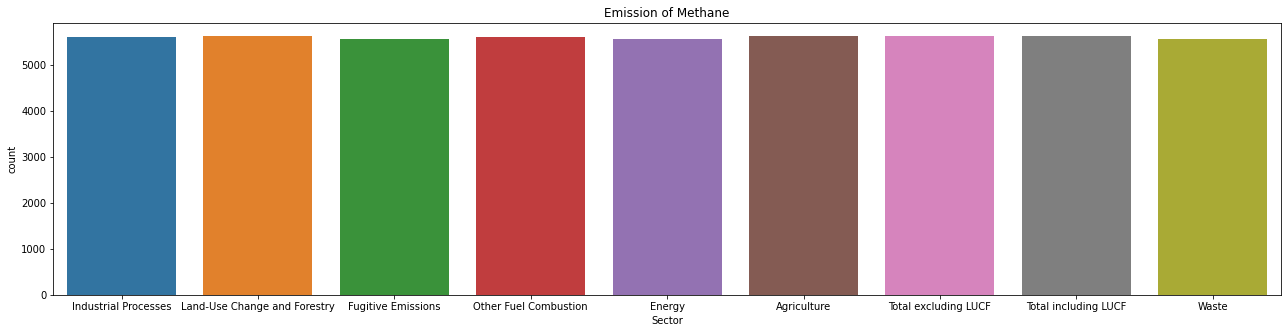

In [5]:
plt.figure(figsize=(22, 5))
sns.countplot(data.Sector)
plt.title("Emission of Methane")
plt.show()

In [6]:
data = data
figure = px.histogram(data, x = "Country", 
                      color = "Sector", 
                      title= "Factors")
figure.show()

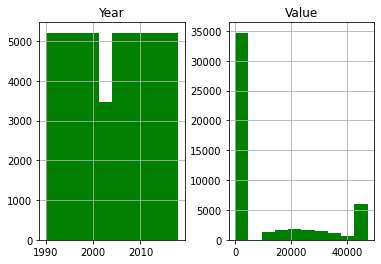

In [7]:
data.hist(color="green")
plt.show()

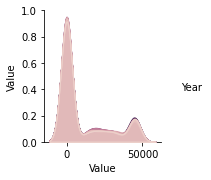

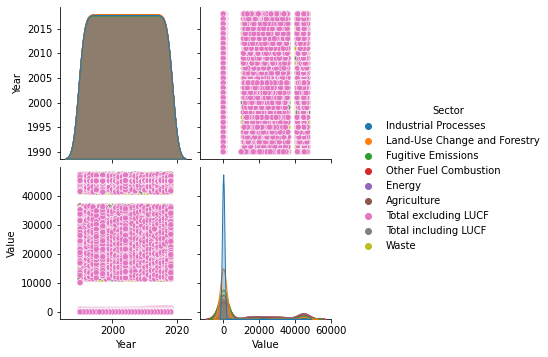

In [9]:
import seaborn
seaborn.pairplot(data, hue ='Year')
seaborn.pairplot(data, hue ='Sector')
plt.show()